In [1]:
cd digit-recognizer/

/home/bhawna/digit-recognizer


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import confusion_matrix
import itertools

In [6]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [8]:
sns.set(style='white', context='notebook', palette='muted')

In [9]:
train = pd.read_csv('train.csv')

In [10]:
test = pd.read_csv('test.csv')

In [11]:
train.shape

(42000, 785)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

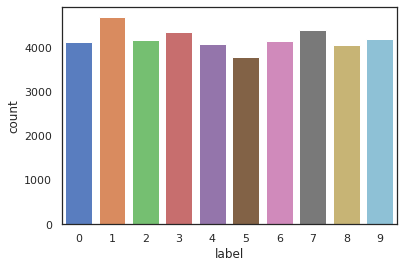

In [12]:
Y_train = train['label']
X_train = train.drop(labels=['label'],axis=1)
del train
g = sns.countplot(Y_train)
Y_train.value_counts()

In [13]:
Y_train.shape

(42000,)

In [14]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [15]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [16]:
X_train = X_train/255.0

In [17]:
test = test/255.0

In [18]:
(X_train.values)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
X_train.values.shape

(42000, 784)

In [20]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [21]:
X_train.shape

(42000, 28, 28, 1)

In [22]:
Y_train = to_categorical(Y_train,num_classes=10)

In [23]:
Y_train.shape

(42000, 10)

In [24]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1,random_state = 2)

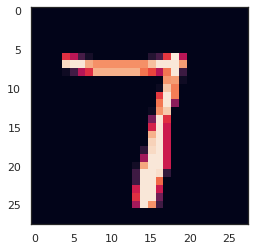

In [25]:
g = plt.imshow(X_train[1][:,:,0])

# A Sequential Model with Conv2D, Maxpool and Dropout Layers

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(filters=32,kernel_size=(5,5), padding = 'Same', activation='relu',input_shape=(28,28,1)))

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
model.add(Conv2D(filters=32,kernel_size=(5,5), padding = 'Same', activation='relu',input_shape=(28,28,1)))

In [29]:
model.add(MaxPool2D(pool_size=(2,2)))

In [30]:
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [31]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [34]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [35]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1,factor=0.5,min_lr=0.00001)
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [36]:
model.fit(X_train,Y_train,epochs=1,callbacks=[learning_rate_reduction],validation_data=(X_val,Y_val),steps_per_epoch=X_train.shape[0]//32, validation_steps=X_val.shape[0]//32)

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/1


ResourceExhaustedError: OOM when allocating tensor with shape[37800,28,28,32] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node conv2d_2/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


# Code snippet for data augmentation to increase the training data

In [43]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

In [44]:
# type(datagen)

keras.preprocessing.image.ImageDataGenerator

In [45]:
# datagen.fit(X_train)

# Obtained an accuracy of 98.02 in 1 epoch

In [46]:
# history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (X_val,Y_val),
#                               verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
#                               , callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 145s - loss: 0.4120 - acc: 0.8674 - val_loss: 0.0643 - val_acc: 0.9802


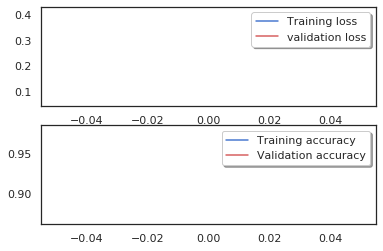

In [51]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [53]:
results = model.predict(test)

In [54]:
type(results)

numpy.ndarray

In [55]:
results = np.argmax(results,axis = 1)

In [56]:
results = pd.Series(results,name="Label")